### Digits recognition using ANN

#### Loading required packages

In [1]:
%pylab inline

import pandas as pd
import os
import numpy as np
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
import keras
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.
/home/sivaji/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
%%bash

ls -ltra

total 1488
-rw-rw-r-- 1 sivaji sivaji 229300 Aug 21 16:00 FirstFile.ipynb
-rw-rw-r-- 1 sivaji sivaji 281359 Aug 21 16:09 SimpleDl.ipynb
-rw-rw-r-- 1 sivaji sivaji 155700 Aug 21 16:10 Changes.ipynb
-rw-rw-r-- 1 sivaji sivaji  35458 Sep  2 00:32 Untitled.ipynb
-rw-rw-r-- 1 sivaji sivaji      0 Nov 29 16:07 imagesdata.p
-rw-rw-r-- 1 sivaji sivaji 413834 Nov 30 07:31 CatsVsDogs_SimpleANN.ipynb
-rw-rw-r-- 1 sivaji sivaji  80456 Dec  7 18:09 CNN.ipynb
drwxrwxr-x 5 sivaji sivaji   4096 Dec  7 18:10 ..
drwxr-xr-x 2 sivaji sivaji   4096 Dec  7 18:12 .ipynb_checkpoints
-rw-rw-r-- 1 sivaji sivaji 302779 Dec  7 18:38 ANN.ipynb
drwxrwxr-x 3 sivaji sivaji   4096 Dec  7 18:38 .


#### Reading training files and it's labes

In [3]:
trainfiels = os.listdir('../train/')
testfiles = os.listdir('../test/')

(499, 375)

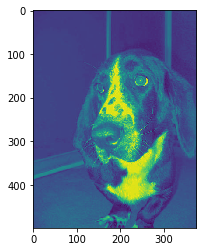

In [4]:
path  = '../train/'
img = imread(path + trainfiels[0],flatten= True,mode = 'L')
plt.imshow(img)
img.shape

/home/sivaji/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


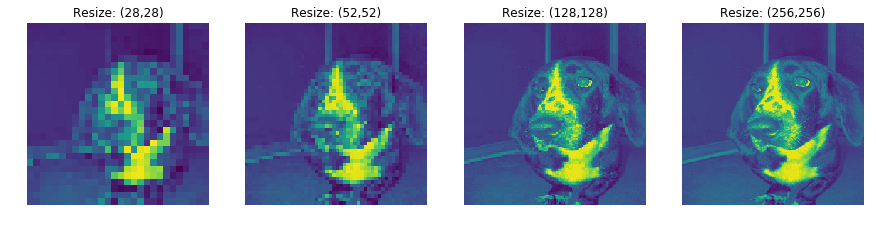

In [5]:
f, axs = plt.subplots(1,4)
f.set_figheight(10)
f.set_figwidth(15)
np.vectorize(lambda ax:ax.axis('off'))(axs)
axs[0].imshow(resize(img,(28,28)))
axs[0].set_title('Resize: (28,28)')
axs[1].imshow(resize(img,(52,52)))
axs[1].set_title('Resize: (52,52)')
axs[2].imshow(resize(img,(128,128)))
axs[2].set_title('Resize: (128,128)')
axs[3].imshow(resize(img,(256,256)))
axs[3].set_title('Resize: (256,256)')
plt.show()

#### Reading images from the disk and creating as an numpy array

In [6]:
path  = '../train/'
train_x = []
label  = []
for f in trainfiels:
    img = imread(path + f,flatten= True,mode = 'L')
    img = resize(img,(128,128))
    img = img.reshape(128*128)
    train_x.append(img)
    label.append(f.lower().find('dog') +1)
    
train_x = np.array(train_x)
train_y = np.array(label)

/home/sivaji/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


#### Spliting training data into train and validation

In [8]:
trainx, valx, trainy,valy = train_test_split(train_x,train_y,test_size=.3)

# converting lables into dummies
trainy = to_categorical(trainy)
valy = to_categorical(valy)

In [9]:
trainx.shape

(17500, 16384)

#### Training a model

In [13]:
## building ANN layers
model = Sequential() 
model.add(Dense(128*128,activation='relu', input_shape=(128*128,)))
model.add(Dropout(0.25))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))
# model.output_shape

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.fit(trainx, trainy, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
17500/17500 [==============================] - 1639s 94ms/step - loss: 8.0961 - acc: 0.4964
Epoch 2/10
17500/17500 [==============================] - 1558s 89ms/step - loss: 8.0172 - acc: 0.5025
Epoch 3/10
17500/17500 [==============================] - 1559s 89ms/step - loss: 8.0462 - acc: 0.5008
Epoch 4/10
17500/17500 [==============================] - 1558s 89ms/step - loss: 8.0462 - acc: 0.5008
Epoch 5/10
17500/17500 [==============================] - 1560s 89ms/step - loss: 8.0462 - acc: 0.5008
Epoch 6/10
17500/17500 [==============================] - 1565s 89ms/step - loss: 8.0462 - acc: 0.5008
Epoch 7/10
17500/17500 [==============================] - 1566s 89ms/step - loss: 8.0462 - acc: 0.5008
Epoch 8/10
17500/17500 [==============================] - 1568s 90ms/step - loss: 8.0462 - acc: 0.5008
Epoch 9/10
17500/17500 [==============================] - 1566s 90ms/step - loss: 8.0462 - acc: 0.5008
Epoch 10/10
17500/17500 [==============================] - 1567s 90ms/ste

In [16]:
valpred = model.predict(valx)
print('Accuracy in validation:', accuracy_score(np.argmax(valy,axis=1),np.argmax(valpred,axis = 1)))

Accuracy in validation: 0.498133333333


In [ ]:
path  = './Images/test/'
test_x = []
for f in testfiles:
    img = imread(path + f,flatten= True,mode = 'L')
    img = resize(img,(256,256))
    img = img.reshape(65536)
    test_x.append(img)
    
test_x = np.array(test_x)